In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature is Gaussian Distributed (Age)

<AxesSubplot:xlabel='Age', ylabel='Count'>

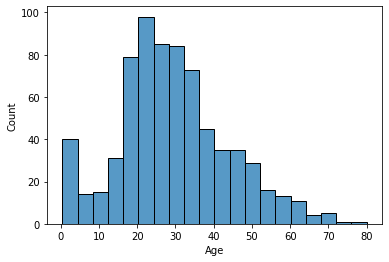

In [11]:
# df["Age"].fillna(100,inplace=True)
sns.histplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age', ylabel='Count'>

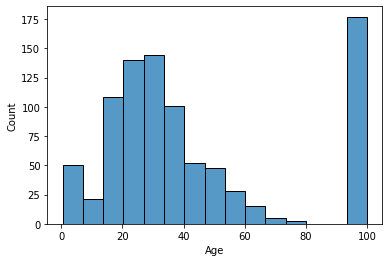

In [10]:
sns.histplot(df["Age"].fillna(100))

Text(0, 0.5, 'No. of Passengers')

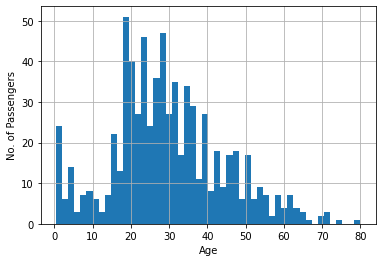

In [13]:
figure = df["Age"].hist(bins=50)
figure.set_xlabel("Age")
figure.set_ylabel("No. of Passengers")

<AxesSubplot:>

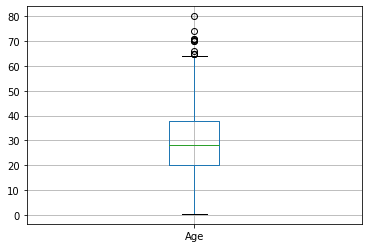

In [15]:
df.boxplot(column="Age")

In [16]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### getting bounds

In [18]:
lower_bound = df["Age"].mean()-3*df["Age"].std()
upper_bound = df["Age"].mean()+3*df["Age"].std()

# Feature is Skewed

Text(0, 0.5, 'No. of Passengers')

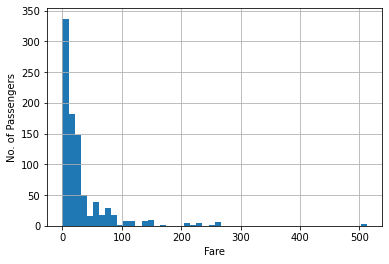

In [24]:
figure = df["Fare"].hist(bins=50)
figure.set_xlabel("Fare")
figure.set_ylabel("No. of Passengers")

<AxesSubplot:>

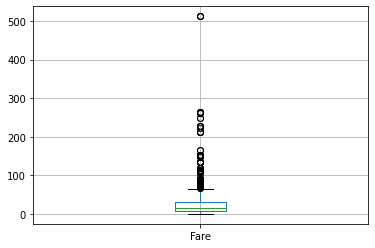

In [25]:
df.boxplot(column="Fare")

In [26]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
IQR = df["Fare"].quantile(0.75) - df["Fare"].quantile(0.25)
IQR

23.0896

In [37]:
lower_bridge = df["Fare"].quantile(0.25)-(IQR*1.5)
uppper_bridge = df["Fare"].quantile(0.75)+(IQR*1.5)
print(lower_bridge,uppper_bridge)

-26.724 65.6344


In [38]:
# for extreme outliers we have
lower_bridge = df["Fare"].quantile(0.25)-(IQR*3)
uppper_bridge = df["Fare"].quantile(0.75)+(IQR*3)
print(lower_bridge,uppper_bridge)

-61.358399999999996 100.2688


In [39]:
## Dealing with Outliers 

In [40]:
### Replace with Bounds 

In [41]:
data = df.copy()

In [44]:
data.loc[data["Age"]>int(upper_bound),"Age"] = int(upper_bound)
data.loc[data["Fare"]>int(uppper_bridge),"Fare"] = int(uppper_bridge)

Text(0, 0.5, 'No. of Passengers')

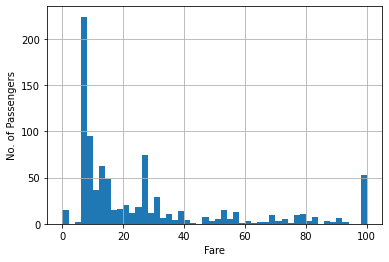

In [46]:
figure = data["Fare"].hist(bins=50)
figure.set_xlabel("Fare")
figure.set_ylabel("No. of Passengers")